In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [363]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [365]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [366]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Cabin feature is pretty interesting, but sadly it's too problematic

In [367]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [368]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [369]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Filling NaNs

In [370]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df.sort_values(by='Embarked').loc[0, 'Embarked'], inplace=True)

Plotting

In [371]:
px.histogram(
    data_frame=df,
    x='Survived',
    color='Sex',
    width=500,
    height=500
)

In [372]:
px.histogram(
    data_frame=df,
    x='Age',
    color='Survived',
    width=900,
    height=500,
    marginal='box'
)

In [373]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [374]:
df['Sex'] = df['Sex'].apply(lambda x: int(x == 'male'))

emb_map = {}
c = 0
for e in set(df['Embarked']):
  df[e] = (df['Embarked'] == e).astype(int)

df = df.drop('Embarked', axis=1)

In [375]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,C
0,0,3,1,22.0,1,0,7.2500,0,1,0
1,1,1,0,38.0,1,0,71.2833,0,0,1
2,1,3,0,26.0,0,0,7.9250,0,1,0
3,1,1,0,35.0,1,0,53.1000,0,1,0
4,0,3,1,35.0,0,0,8.0500,0,1,0


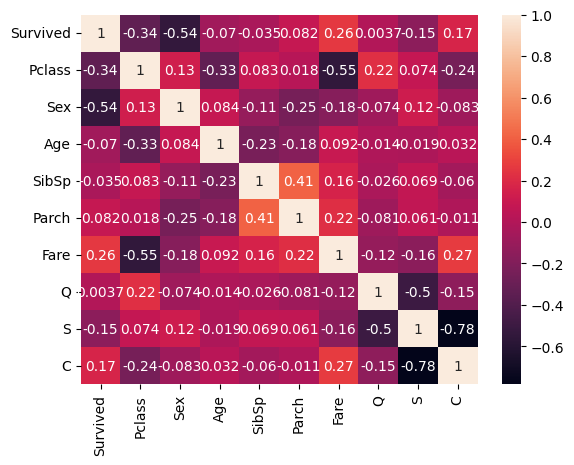

In [376]:
sns.heatmap(df.corr(), annot=True);

In [377]:
X, y = df.drop('Survived', axis=1), df['Survived']

In [378]:
from sklearn.model_selection import train_test_split

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [380]:
from xgboost import XGBClassifier

In [381]:
clf = XGBClassifier(max_depth=4)
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [382]:
from sklearn.metrics import accuracy_score

In [383]:
train_pred = clf.predict(X_train)
accuracy_score(y_train, train_pred)

0.9367977528089888

In [384]:
test_pred = clf.predict(X_test)
accuracy_score(y_test, test_pred)

0.8491620111731844

In [385]:
from sklearn.model_selection import GridSearchCV

In [386]:
best_boost = GridSearchCV(
    estimator=clf,
    param_grid={'max_depth': range(3, 9)},
    cv=3
)

best_boost.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=4,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': range(3, 9)})

In [387]:
best_boost.best_score_

0.8145941921072226

In [388]:
clf1 = best_boost.best_estimator_

clf1.fit(X_train, y_train)

pred = clf1.predict(X_test)

accuracy_score(y_test, pred)

0.8547486033519553

<img src='https://i.kym-cdn.com/photos/images/newsfeed/002/528/119/556.gif'>